our job is to develop a predictive model that can predict whether or not a movie is a <i>Drama</i>. In order to do so you need to use the textual features of the movie stories and creat your predictive models. There are totally three different files in this project.

<ol>
    <li><b>movie_story_student_file.csv</b>: This file contains the movie stories that should be used by students for model development.</li>
    <li><b>movie_story_evaluation_file.csv</b>: This file should NOT be used for model development purposes. Students should only use this file after developing their predictive models and selecting their best final model. They then need to use their best predictive model and predict whether or not the movies in <b>movie story evaluation file.csv</b> are Drama.</li>
    <li><b>movies.csv</b>: This file contain the movie genres.</li>
</ol>

<b>Step 1:</b> Explore all files to become familiar with the dataset <br />
<b>Step 2:</b> There are 20,000 movies in `movie_story_student_file.csv`file. Use the `movies.csv` file to determine whether a movie is Drama or not. The final output of this step should be development of a dataframe file that contains three columns: 1) movieId, 2) story, 3) DramaGenre. The value for the third column should be in a binary format. If the movie is drama the value should be 1, otherwise 0. Name the new file as `main_dataset`. <br />
<b>Step 3:</b> If you want to just have one train and one test set, then split the `main_dataset` to train and test sets. Otherwise you can use cross validation methods.  <br />
<b>Step 4:</b> Use your supervised learning and text analysis knowledge to develope different predictive models (i.e. logestic regression, random forest, ...). Test the performance of your models in terms of accuracy, precision, recall, and F1 scores. <br />
<b>Step 5:</b> Choose one of your best models (only one). Then use the full data available in `main dataset` to train that model.<br />
<b>Step 6:</b> Prepare data in `movie_story_evaluation_file.csv` for prediction. You need to perform the exact same steps that you have done in <b>Step 2</b> to prepare this new dataset. Name the new dataset as `evaluation_dataset`. <br />
<b>Step 7:</b> Use your selected model in Step 5 to predict whether or not movies in `evaluation_dataset` are Drama movies. <br />
<b>Step 8:</b> Report the final accuracy, precision, recall and F1 score. <br />

-

<h1 align='center' style="color: blue;"> Approach and Solution</h1>

##### As stated in the project's additional guidelines, we will approach the problem step by step, adding comments at each step on how and what we did to arrive at a solution.

<h3 align='left' style="color: Green ;">Step 1: Explore Datasets </h3>

Explore all files to become familiar with the dataset. Read movies.csv, movie_story_student_file.csv and  movie_story_evaluation_file.csv files

### Movies dataset

The shape of the dataset is (23498, 3) that is 23498 rows/observations and 3 columns. The movies dataset contains movie ids, titles, and genres. 

> movieId: Each movie is given a unique identifier.

> title: The title of the film includes the name of the movie as well as the year it was released. We can filter the movies released in any given year based on the year in the title and visualize them if necessary.

> genres: This column describes the film's genre. This column can be used to sort a movie by movie genre. Our purpose is to find movies of the drama genre.

<p>Let's have a look at the data.</p>

In [168]:
#View movies.csv file
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
movies = pd.read_csv('movies.csv')
print(movies.shape)
movies.head()

(23498, 3)


,movieId,title,genres
0,27509,Carolina (2005),Comedy|Romance
1,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller
2,27788,"Jacket, The (2005)",Drama|Mystery|Sci-Fi|Thriller
3,27821,"Interpreter, The (2005)",Drama|Thriller
4,27839,"Ring Two, The (2005)",Drama|Horror|Mystery|Thriller


#### We can use various filters to find movies based on their year of release, genre, and so on. Let us take a look.

In [169]:
#Filter data that are released in 2005

flag2 = movies['title'].str.contains("2005")
filtered_movie_by_year = movies[flag2]
print(filtered_movie_by_year.shape)
filtered_movie_by_year.head()

(1070, 3)


,movieId,title,genres
0,27509,Carolina (2005),Comedy|Romance
1,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller
2,27788,"Jacket, The (2005)",Drama|Mystery|Sci-Fi|Thriller
3,27821,"Interpreter, The (2005)",Drama|Thriller
4,27839,"Ring Two, The (2005)",Drama|Horror|Mystery|Thriller


##### Let's count the number of movies in each genre. 

Also, We assign values based on the values in the genres column;  for example if the movie genre is Drama, the value in the drame column is 1; otherwise, it is 0. 

In [170]:
#Filter data based on movie genres list
genres = movies['genres'].tolist()
genres = '|'.join(genres)
genres = genres.split('|')
genres = sorted(list(set(genres)))
print(genres)
for genre in genres:
    movies[genre] = movies['genres'].apply(lambda x: 1 if genre in x else 0)
movies.head()

['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,27509,Carolina (2005),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,27788,"Jacket, The (2005)",Drama|Mystery|Sci-Fi|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,27821,"Interpreter, The (2005)",Drama|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,27839,"Ring Two, The (2005)",Drama|Horror|Mystery|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


#### Lets print the count of movies in each genere and visualize them in bar graph 

(no genres listed)    				1310
Action    				2766
Adventure    				1390
Animation    				1150
Children    				1083
Comedy    				6141
Crime    				1711
Documentary    				3247
Drama    				9835
Fantasy    				1056
Film-Noir    				18
Horror    				2587
IMAX    				159
Musical    				214
Mystery    				1102
Romance    				2601
Sci-Fi    				1424
Thriller    				4027
War    				488
Western    				143


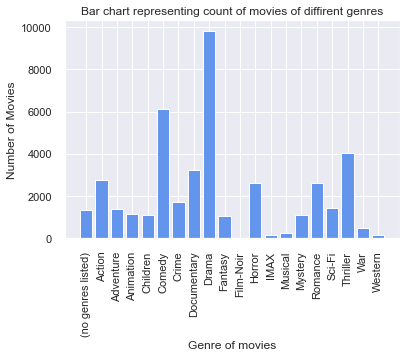

In [171]:
import matplotlib as mpl
import matplotlib.pyplot as plt

d ={}
for i in movies.columns[3:]:
    d[i]=movies[i].value_counts()[1]
    print("{}    \t\t\t\t{}".format(i,d[i]))

# Bar graph 
plt.bar(height=d.values(),x=d.keys(), color = 'cornflowerblue')

#labelling
plt.title('Bar chart representing count of movies of diffirent genres')
plt.ylabel('Number of Movies')
plt.xlabel('Genre of movies')


# To have a clear presentation
plt.xticks(rotation=90)

plt.show()

<p><b>Note:</b> From the visualizaion results, the movies in Drama genre has the highest count .</p>

<p><b>Important point:</b> We also notice that several movies have No Genre specified ('(no genre listed)'). In the long run, training models with these numbers marked as non-dramatic will result in prediction inaccuracy, thus we must handle these values before training models. For improved training models and predictions, these values will be eliminated during pre-processing.</p>

-

### Movie_story_student dataset

In [172]:
# View movie_story_student_file.csv file
import pandas as pd
student_file = pd.read_csv('movie_story_student_file.csv')
print(student_file.shape)
student_file.head()

(20000, 2)


,movie_id,story
0,131072,A girl who always tends to fall in love with t...
1,196609,"Bigfoot has come to the town of Ellwood City, ..."
2,131074,"At an altitude of 18,000 feet, Alaska\'s Mount..."
3,196611,"In her first special since 2003, Ellen revisit..."
4,196613,Mike and Sulley are back at Monsters Universit...


The shape of the dataset is (20000, 2) that is 20000 rows/observations and 2 columns. The dataset contains movie ids, and story. 

> movieId: Each movie is given a unique identifier. This identifier can be used for joining or grouping two or more data sets. for example, join movies and  movie_story_student_file.csv file or movies and movie_story_evaluation_file.csv file

> story: Story column gives the summary of the movie. This particular column can be used to apply text analysis methods and find out the genere of the movie. we will see applying the TA methods in pre processing step.

-

### Movie_story_evaluation dataset

In [173]:
#View movie story evaluation file.csv file
import pandas as pd
evaluation_file = pd.read_csv('movie_story_evaluation_file.csv')
print(evaluation_file.shape)
evaluation_file.head()

(3498, 2)


,movie_id,story
0,122349,Growing up in the Mission district of San Fran...
1,122351,A soldier returns home from the Iraq war only ...
2,122361,Marco the Monkey works as a beach officer. But...
3,187901,"When an honest cop, Vijay Kumar\'s family is r..."
4,187903,"Kathiresan aka Kaththi, a criminal, escapes fr..."


The shape of the dataset is (3498, 2) that is 3498 rows/observations and 2 columns. The dataset contains movie ids, and story. This dataset can be used to make predictions using the best prediction model.

-

<h3 align='left' style="color: Green ;"> Step 2: Pre - Processing </h3>

Development of a dataframe file that contains three columns: 1) movieId, 2) story, 3) DramaGenre using movies and Movie_story_student dataset. The value for the third column should be in a binary format. If the movie is drama the value should be 1, otherwise 0. Name the new file as main_dataset.


<p align='left' style="color: red ">A) Check if there are any null values in all three dataset.</p>

In [174]:
#movies dataset
movies.isnull().any() 

movieId               False
title                 False
genres                False
(no genres listed)    False
Action                False
Adventure             False
Animation             False
Children              False
Comedy                False
Crime                 False
Documentary           False
Drama                 False
Fantasy               False
Film-Noir             False
Horror                False
IMAX                  False
Musical               False
Mystery               False
Romance               False
Sci-Fi                False
Thriller              False
War                   False
Western               False
dtype: bool

In [175]:
#story_student file dataset
student_file.isnull().any() 

movie_id    False
story       False
dtype: bool

In [176]:
#story_evaluation file dataset
evaluation_file.isnull().any() 

movie_id    False
story       False
dtype: bool

Note: No Null values found in any of the datasets

<p align='left' style="color: red ">B) Handling No genre list values.</p>

In [177]:
#Filtering No genre list to a new data frame "filtered_no_genre" for later point of use in the project
no_genre_list = movies['genres'].str.contains("(no genres listed)")
filtered_no_genre = movies[no_genre_list]
filtered_no_genre.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3810,91246,Milky Way (Tejút) (2007),(no genres listed),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6530,115004,It's My Mother's Birthday Today (2008),(no genres listed),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6661,116126,Complicit (2013),(no genres listed),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7064,118878,Sekirei (2008),(no genres listed),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7481,122573,Expecting Amish (2014),(no genres listed),1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [178]:
#Drop (no genre listed) Values from the dataset and check shape.
for i in filtered_no_genre.index:
    movies.drop(i,inplace=True)
movies.shape

(22188, 23)

<p align='left' style="color: red">C) Renaming the cloumn name of movies dataset.</p>

Take note that the names of the movie Id columns in the movies dataset and the other datasets differ. To join the datasets, we must rename the column names in the movies dataset to match those in the student and evaluation files. 

In [179]:
#Rename column
movies = movies.rename(columns={'movieId':'movie_id'}) 
movies.shape

(22188, 23)

<p align='left' style="color: red">D) Create a main dataset by merging the movies and story student file datasets. In the following section, we will develop this main_dataset data frame file, which contains three columns: 1) movieId, 2) story, 3) DramaGenre</p>



In [180]:
#merge datasets
main_dataset = pd.merge(movies,student_file, on='movie_id')
print(main_dataset.shape)
main_dataset.head()

(18886, 24)


,movie_id,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,story
0,27509,Carolina (2005),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,A young woman escapes her wildly eccentric fam...
1,27618,"Sound of Thunder, A (2005)",Action|Adventure|Drama|Sci-Fi|Thriller,0,1,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,When a hunter sent back to the prehistoric era...
2,27788,"Jacket, The (2005)",Drama|Mystery|Sci-Fi|Thriller,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,A military veteran goes on a journey into the ...
3,27821,"Interpreter, The (2005)",Drama|Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"After Silvia Broome, an interpreter at United ..."
4,27839,"Ring Two, The (2005)",Drama|Horror|Mystery|Thriller,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,Rachel Keller must prevent evil Samara from ta...


<p align='left' style="color: red">E) Checking if there are any missing values or NAN values in main_dataset after merging.</p>

In [181]:
#Check null values in main_dataset
main_dataset.isnull().any() 

movie_id              False
title                 False
genres                False
(no genres listed)    False
Action                False
Adventure             False
Animation             False
Children              False
Comedy                False
Crime                 False
Documentary           False
Drama                 False
Fantasy               False
Film-Noir             False
Horror                False
IMAX                  False
Musical               False
Mystery               False
Romance               False
Sci-Fi                False
Thriller              False
War                   False
Western               False
story                 False
dtype: bool

<p><b>Note:</b> No Null values found in any of the datasets.</p>

<p align='left' style="color: red">E) Dropping the title and genres columns (except Drama) such that it will have only movie_id , story and DramaGenre columns in the final output of main_dataset file.</p>


In [182]:
#Drop columns except movie_id, DramaGenre and story
for col in main_dataset.columns:
    if (col != 'movie_id') and (col != 'story') and (col != 'Drama'):
        main_dataset =  main_dataset.drop(col, axis = 1) 
main_dataset = main_dataset.rename(columns={'Drama':'DramaGenre'})
main_dataset.head(20)

,movie_id,DramaGenre,story
0,27509,0,A young woman escapes her wildly eccentric fam...
1,27618,1,When a hunter sent back to the prehistoric era...
2,27788,1,A military veteran goes on a journey into the ...
3,27821,1,"After Silvia Broome, an interpreter at United ..."
4,27839,1,Rachel Keller must prevent evil Samara from ta...
5,27881,0,A comic drama about a time in the near future ...
6,27904,1,An undercover cop in a not-too-distant future ...
7,30793,0,A young boy wins a tour through the most magni...
8,30894,1,An architect\'s desire to speak with his wife ...
9,30896,0,A young detective goes undercover at an elite ...


<p><b>Note:</b> The above is the final output file names Main_dataset with columns ''movie_id ,'Drama', and 'story'.</p>

<p align='left' style="color: red"> F) Cleaning of Data, The movie's plot summary contains some special characters, that must be removed. </p>


In [183]:
main_dataset.story = main_dataset.story.astype(str)
type(main_dataset.story)

pandas.core.series.Series

In [184]:
# function for text cleaning 
import re
def clean_storyplot(movie_plot): 
    movie_plot = re.sub("\'", "",movie_plot)  # remove backslash and apostrophe(/').
    movie_plot = re.sub("[^a-zA-Z]"," ",movie_plot)  # remove everything except alphabets
    movie_plot = re.sub(r'\b\w{1,3}\b','',movie_plot) # remove all words that are less than 3 characters
    movie_plot = ' '.join(movie_plot.split()) # remove whitespaces 
#     movie_plot = movie_plot.lower() # convert movie_plot to lowercase
    return movie_plot

main_dataset['story'] = main_dataset['story'].apply(lambda x: clean_storyplot(x))
main_dataset.head()

,movie_id,DramaGenre,story
0,27509,0,young woman escapes wildly eccentric family se...
1,27618,1,When hunter sent back prehistoric runs path mu...
2,27788,1,military veteran goes journey into future wher...
3,27821,1,After Silvia Broome interpreter United Nations...
4,27839,1,Rachel Keller must prevent evil Samara from ta...


<p align='left' style="color: red"> G) Remove Puncuations </p>


In [185]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

main_dataset.story = main_dataset.story.apply(lambda text: remove_punctuation(text))
main_dataset.story

0        young woman escapes wildly eccentric family se...
1        When hunter sent back prehistoric runs path mu...
2        military veteran goes journey into future wher...
3        After Silvia Broome interpreter United Nations...
4        Rachel Keller must prevent evil Samara from ta...
                               ...                        
18881    When Jesper distinguishes himself Postal Acade...
18882    automated girl tortoise warrior journey with b...
18883    Aria Eubank convinces famous travel writer fea...
18884    During scorching summer Belgian Dutch border v...
18885    years Merthner heartbroken after girlfriend An...
Name: story, Length: 18886, dtype: object

<p align='left' style="color: red"> H) Import NTLK package and Apply Stopwords</p>


In [186]:
#Advanded Tokenization, Stemminng, and Lemmatization
import sys
# !conda install --yes --prefix "{sys.prefix}" nltk

import nltk
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('stopwords')

In [187]:
# Remove Stop words from Story
from nltk.corpus import stopwords
stop = stopwords.words('english')
main_dataset.story  = main_dataset.story.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
main_dataset.story.head()

0    young woman escapes wildly eccentric family se...
1    When hunter sent back prehistoric runs path mu...
2    military veteran goes journey future foresee d...
3    After Silvia Broome interpreter United Nations...
4    Rachel Keller must prevent evil Samara taking ...
Name: story, dtype: object

<p align='left' style="color: red"> I) Apply Lemmatizer with POS, Stemmer and Lemmetizer</p>


In [188]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

main_dataset.story = main_dataset.story.apply(lambda text: lemmatize_words(text))
main_dataset.story.head()

0    young woman escape wildly eccentric family sea...
1    When hunter send back prehistoric run path mus...
2    military veteran go journey future foresee dea...
3    After Silvia Broome interpreter United Nations...
4    Rachel Keller must prevent evil Samara take po...
Name: story, dtype: object

In [189]:
#Stemming

from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

main_dataset.story = main_dataset.story.apply(lambda text: stem_words(text))
main_dataset.story.head()

0    young woman escap wildli eccentr famili search...
1    when hunter send back prehistor run path must ...
2    militari veteran go journey futur forese death...
3    after silvia broom interpret unit nation headq...
4    rachel keller must prevent evil samara take po...
Name: story, dtype: object

In [190]:
#lemmatizer
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

main_dataset.story = main_dataset.story.apply(lambda text: lemmatize_words(text))
main_dataset.story.head()

0    young woman escap wildli eccentr famili search...
1    when hunter send back prehistor run path must ...
2    militari veteran go journey futur forese death...
3    after silvia broom interpret unit nation headq...
4    rachel keller must prevent evil samara take po...
Name: story, dtype: object

<p align='left' style="color: red"> J) Apply lower case</p>


In [191]:
main_dataset.story = main_dataset.story.str.lower()
main_dataset.story.head()

0    young woman escap wildli eccentr famili search...
1    when hunter send back prehistor run path must ...
2    militari veteran go journey futur forese death...
3    after silvia broom interpret unit nation headq...
4    rachel keller must prevent evil samara take po...
Name: story, dtype: object

Note: Preprocessing is a frequent practice before using any Text Analysis model:

-

<h3 align='left' style="color: Green ;"> Step 3: Data Partision : Dependent and independent variables Dataset </h3>

In [192]:
X = main_dataset[['movie_id','story']]
y = main_dataset.DramaGenre

-

<h3 align='left' style="color: Green ;"> Step 4: Apply Text Analysis and Supervised learning on main dataset </h3>

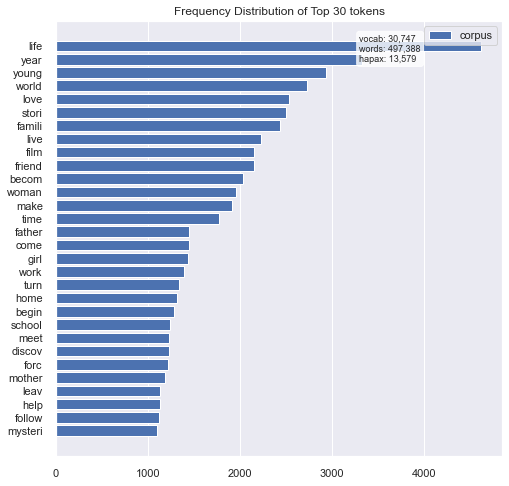

<AxesSubplot:title={'center':'Frequency Distribution of Top 30 tokens'}>

In [193]:
#Apply term Frequency Matrices
from yellowbrick.text.freqdist import FreqDistVisualizer 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#Ngrams with stopwords
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words="english").fit(X.story)
tfm = vect.transform(X.story)

# Get all features (tokens)
main_dataset_features = vect.get_feature_names()

# Use yellowbrick package for visualization of top 30 tokens
fig, ax = plt.subplots(figsize=(8, 8))
visualizer = FreqDistVisualizer(features=main_dataset_features, n=30)
visualizer.fit(tfm)
visualizer.poof()

<p align='left' style="color: red"> Rescaling the data with TF-IDF, The intuition of this method is to give high weight to any term that appears often in a particular document, but not in many documents in the corpus. If a word appears often in a particular story, but not in very many stories, it is likely to be very descriptive of the content of that story. </p>

In [118]:
# Apply Term Frequency - Inverse Document Frequency method
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words="english", ngram_range=(1,2),max_features=20000).fit(X.story) 
tfid = vect.transform(X.story)
print("The number of features are: {}".format(len(vect.get_feature_names())))
tfid_main = pd.DataFrame(tfid.toarray(), columns=vect.get_feature_names())
tfid_main[18:23]

The number of features are: 20000


,aaron,abandon,abandon asylum,abandon babi,abandon build,abandon famili,abandon hospit,abandon hotel,abandon hous,abandon husband,...,ziggi,zimmer,zixin,zombi,zombi apocalyps,zombi like,zombi outbreak,zone,zquez,zurich
18,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.148111,0.0,0.0,0.0,0.252603,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2 align='center' style="color: orange;">Run Supervised Learning Models on main dataset and evaluate metrics</h2>

In [119]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from prettytable import PrettyTable
from sklearn import model_selection

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [120]:
#Obtain the following performance metrics
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1':'f1_weighted',
          'AUC' : 'roc_auc_ovr_weighted'
          }

### Logistic Regression

In [121]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.5, 1]}
grid = GridSearchCV(LogisticRegression(max_iter=300), param_grid, cv=3) 
grid.fit(tfid_main, y)
print("Best cross-validation score: {:.2f}".format(grid.best_score_*100)) 
print("Best parameters: ", grid.best_params_)

#Run Best Estimator model
bestModel_log = grid.best_estimator_

print("\n")

scores = cross_validate(bestModel_log,  tfid_main, y, scoring=scoring, cv=3, 
                        return_train_score=False)
# Obtain mean or median values of each performace metrics
print("Cross validation, Mean Score metrics for Logistic regression are as follows:\n")
for key, value in scores.items():                              
    print("{} : {} ".format(key,np.mean(value)*100))


Best cross-validation score: 69.73
Best parameters:  {'C': 1}
fit_time : 1649.228596687317 
score_time : 74.6086279551188 
test_accuracy : 69.73421689965245 
test_precision : 69.61630584301317 
test_recall : 69.73421689965245 
test_f1 : 69.44847973503889 
test_AUC : 77.1014587479096 


-

### KNN model

In [122]:
#Intialize the model - Using GridSearchCV to find the n_neighnors hyperparameters
KNN_model = KNeighborsClassifier()

#Data Partition
param_grid = {'n_neighbors': [180,190,200]}
cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, return_train_score=False)
grid.fit(tfid_main, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))


#Run Best Estimator model
bestModel_KNN = grid.best_estimator_
print("\n")
#scores for best estimator model
scores = cross_validate(bestModel_KNN,  tfid_main, y, scoring=scoring, cv=3, 
                        return_train_score=False)


print("Cross validation, Mean Score metrics for KNN Neighbors are as follows:\n")

for key, value in scores.items():                               # Obtain mean or median values of each performace metrics
    print("{} : {} ".format(key,np.mean(value)*100))

Best Parameter: {'n_neighbors': 190}
Best Cross Vlidation Score: 0.6827282279994039
Mean Score metrics for KNN Neighbors are as follows:

fit_time : 126.67497793833415 
score_time : 8480.695501963299 
test_accuracy : 67.66917331174879 
test_precision : 68.21669238005322 
test_recall : 67.66917331174879 
test_f1 : 66.40351458047721 
test_AUC : 75.9180055296785 


-

### DecisionTree Classifier

In [124]:
#Intialize the model - Using GridSearchCV to find the max_depth hyperparameters
DC_model = DecisionTreeClassifier()

param_grid = {'max_depth': [7,8,9]}
cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
grid = GridSearchCV(DC_model, param_grid, cv = cv, 
                    return_train_score=True)
grid.fit(tfid_main, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

#Run Best Estimator model
bestModel_DC = grid.best_estimator_

scores = cross_validate(bestModel_DC,  tfid_main, y, scoring=scoring, cv=3, 
                        return_train_score=False)
print("\n")
print("Mean Score metrics for Decesion Tree Classifier are as follows:\n")

for key, value in scores.items():                               # Obtain mean or median values of each performace metrics
    print("{} : {} ".format(key,np.mean(value)*100))

Best Parameter: {'max_depth': 8}
Best Cross Vlidation Score: 0.6084925764483016
Mean Score metrics for Decesion Tree Classifier are as follows:

fit_time : 4754.386361440023 
score_time : 93.06274255116782 
test_accuracy : 60.91814412721418 
test_precision : 60.48685888166507 
test_recall : 60.91814412721418 
test_f1 : 60.282967966001685 
test_AUC : 62.42675768490238 


-

### Multinomial Naive Bayes

In [138]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB

MNB_model = MultinomialNB()

#Apply Cross Validation to get the performance metrics of the model
scores = cross_validate(MNB_model,  tfid_main, y, scoring=scoring, cv=3, 
                        return_train_score=False)

print("Mean Score metrics for Multinomial Naive Bayes model are as follows:\n")

for key, value in scores.items():                               # Obtain mean or median values of each performace metrics
    print("{} : {} ".format(key,np.mean(value)*100))

Mean Score metrics for Multinomial Naive Bayes model are as follows:

fit_time : 164.4484519958496 
score_time : 87.02313105265299 
test_accuracy : 69.2099803902373 
test_precision : 69.3897267481605 
test_recall : 69.2099803902373 
test_f1 : 68.47105927149123 
test_AUC : 77.0650403557407 


-

### Random Forest

In [143]:
#Intialize the model - Using GridSearchCV to find the n_neighnors hyperparameters
RF_model = RandomForestClassifier()

#Data Partition
param_grid = {'n_estimators': [200, 250, 300]}
cv = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
grid = GridSearchCV(RF_model, param_grid, cv = cv, return_train_score=False)
grid.fit(tfid_main, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))


#Run Best Estimator model
bestModel_RF = grid.best_estimator_

scores = cross_validate(bestModel_RF,  tfid_main, y, scoring=scoring, cv=3, 
                        return_train_score=False)

print("Mean Score metrics for Random Forest Classifier are as follows:\n")

for key, value in scores.items():                               # Obtain mean or median values of each performace metrics
    print("{} : {} ".format(key,np.mean(value)*100))

Best Parameter: {'n_estimators': 300}
Best Cross Vlidation Score: 0.6890289870576912
Mean Score metrics for Random Forest Classifier are as follows:

fit_time : 77569.79639530182 
score_time : 621.8020280202229 
test_accuracy : 69.25231934476682 
test_precision : 69.17025968816588 
test_recall : 69.25231934476682 
test_f1 : 69.17304770045716 
test_AUC : 75.59632352373646 


### MLP Classifier

In [139]:
# Neural Networks
from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier(solver='lbfgs',random_state=0, max_iter=5000, 
                      hidden_layer_sizes=[25,10])


#Apply Cross Validation to get the performance metrics of the model
scores = cross_validate(MLP_model,  tfid_main, y, scoring=scoring, cv=3, 
                        return_train_score=False)

print("Mean Score metrics for Stochastic Gradient Descent  model are as follows:\n")

for key, value in scores.items():                               # Obtain mean or median values of each performace metrics
    print("{} : {} ".format(key,np.mean(value)*100))

Mean Score metrics for Stochastic Gradient Descent  model are as follows:

fit_time : 47765.8650636673 
score_time : 111.70847415924072 
test_accuracy : 65.24940967179468 
test_precision : 65.26063830123272 
test_recall : 65.24940967179468 
test_f1 : 65.24647979302385 
test_AUC : 71.04447900015481 


-

<h3 align='left' style="color: Green ;"> Step5: Choose best model and use full data available in main dataset to train the model. </h3>



Evaluating model based on fit time, score time, test accuracy, precesion, recall, f1 score and Auc score. Logestic model has the highest test accuracy, precesion, recall, f1,and Auc scores but the time takes to fit and score the model is also high.

Multinomial Naive Bayes takes less time to fit and score along with better test accuracy, precesion, recall, f1,and Auc scores compared to others.

In [198]:
############################### Best Model to train on full dataset ##############################
# Step 1
from sklearn.naive_bayes import MultinomialNB
# Step 2
best_model_of_all = MultinomialNB()
# Step 3
best_model_of_all.fit(tfid_main, y)

MultinomialNB()

-

<h3 align='left' style="color: Green ;"> Step 6: Prepare data in movie_story_evaluation_file.csv for prediction. You need to perform the exact same steps that you have done in Step 2 to prepare this new dataset. Name the new dataset as evaluation_dataset.</h3>


In [125]:
#merge datasets
evaluation_dataset = pd.merge(movies,evaluation_file, on='movie_id')
print(evaluation_dataset.shape)
evaluation_dataset.head()

(3302, 24)


,movie_id,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,story
0,56835,Pledge This! (2006),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"At popular South Beach University, filthy rich..."
1,56837,As You Like It (2006),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,"Witty, playful and utterly magical, the story ..."
2,56846,Rabbit Without Ears (Keinohrhasen) (2007),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,Rainbow press reporter Ludo is sentenced to 8 ...
3,56869,Drained (O cheiro do Ralo) (2006),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,A pawn shop proprietor buys used goods from de...
4,56885,"Great Debaters, The (2007)",Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,The true story of a brilliant but politically ...


In [126]:
#Dropping all columns except movie_id, Drama and story
for col in evaluation_dataset.columns:
    if (col != 'movie_id') and (col != 'story') and (col != 'Drama'):
        evaluation_dataset =  evaluation_dataset.drop(col, axis = 1)
evaluation_dataset = evaluation_dataset.rename(columns={'Drama':'DramaGenre'})
evaluation_dataset.head(10)

,movie_id,DramaGenre,story
0,56835,0,"At popular South Beach University, filthy rich..."
1,56837,1,"Witty, playful and utterly magical, the story ..."
2,56846,0,Rainbow press reporter Ludo is sentenced to 8 ...
3,56869,0,A pawn shop proprietor buys used goods from de...
4,56885,1,The true story of a brilliant but politically ...
5,56888,1,Bilike has never seen a ping-pong ball before....
6,56908,1,"A modern love story in which a misanthropic, e..."
7,56915,0,A lonely boy discovers a mysterious egg that h...
8,56941,1,A young widow discovers that her late husband ...
9,56945,0,"Laughter, love and just a hint of magic make f..."


### Evaluation Dataset Cleaning

In [127]:
evaluation_dataset.story = evaluation_dataset.story.astype(str)
type(evaluation_dataset.story)

pandas.core.series.Series

In [128]:
#Cleaning Story summaries by reusing Clean_storyplot() function created in Step 2 
evaluation_dataset.story = evaluation_dataset.story.apply(lambda x: clean_storyplot(x))
evaluation_dataset.head()

,movie_id,DramaGenre,story
0,56835,0,popular South Beach University filthy rich sup...
1,56837,1,Witty playful utterly magical story compelling...
2,56846,0,Rainbow press reporter Ludo sentenced months r...
3,56869,0,pawn shop proprietor buys used goods from desp...
4,56885,1,true story brilliant politically radical debat...


In [129]:
#Remove Puncuations
evaluation_dataset.story = evaluation_dataset.story.apply(lambda text: remove_punctuation(text))
evaluation_dataset.story

0       popular South Beach University filthy rich sup...
1       Witty playful utterly magical story compelling...
2       Rainbow press reporter Ludo sentenced months r...
3       pawn shop proprietor buys used goods from desp...
4       true story brilliant politically radical debat...
                              ...                        
3297    account professional personal life renowned Am...
3298    Sophia Grace Rosie sent Switzelvania special c...
3299    Doctors nutritionists authors entrepreneurs fr...
3300    Paul Liebrandt most talented controversial che...
3301    woman gets released from prison reunites with ...
Name: story, Length: 3302, dtype: object

In [130]:
# Remove Stop words from Story
from nltk.corpus import stopwords
stop = stopwords.words('english')
evaluation_dataset.story  = evaluation_dataset.story.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
evaluation_dataset.story.head()

0    popular South Beach University filthy rich sup...
1    Witty playful utterly magical story compelling...
2    Rainbow press reporter Ludo sentenced months r...
3    pawn shop proprietor buys used goods desperate...
4    true story brilliant politically radical debat...
Name: story, dtype: object

In [131]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

evaluation_dataset.story = evaluation_dataset.story.apply(lambda text: lemmatize_words(text))
evaluation_dataset.story.head()

0    popular South Beach University filthy rich sup...
1    Witty playful utterly magical story compelling...
2    Rainbow press reporter Ludo sentence month rel...
3    pawn shop proprietor buy use good desperate lo...
4    true story brilliant politically radical debat...
Name: story, dtype: object

In [132]:
#Stemming

from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

evaluation_dataset.story = evaluation_dataset.story.apply(lambda text: stem_words(text))
evaluation_dataset.story.head()

0    popular south beach univers filthi rich super ...
1    witti play utterli magic stori compel romant a...
2    rainbow press report ludo sentenc month releas...
3    pawn shop proprietor buy use good desper local...
4    true stori brilliant polit radic debat team co...
Name: story, dtype: object

In [133]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

evaluation_dataset.story = evaluation_dataset.story.apply(lambda text: lemmatize_words(text))
evaluation_dataset.story.head()

0    popular south beach univers filthi rich super ...
1    witti play utterli magic stori compel romant a...
2    rainbow press report ludo sentenc month releas...
3    pawn shop proprietor buy use good desper local...
4    true stori brilliant polit radic debat team co...
Name: story, dtype: object

In [134]:
#lower case
evaluation_dataset.story = evaluation_dataset.story.str.lower()
evaluation_dataset.head()

,movie_id,DramaGenre,story
0,56835,0,popular south beach univers filthi rich super ...
1,56837,1,witti play utterli magic stori compel romant a...
2,56846,0,rainbow press report ludo sentenc month releas...
3,56869,0,pawn shop proprietor buy use good desper local...
4,56885,1,true stori brilliant polit radic debat team co...


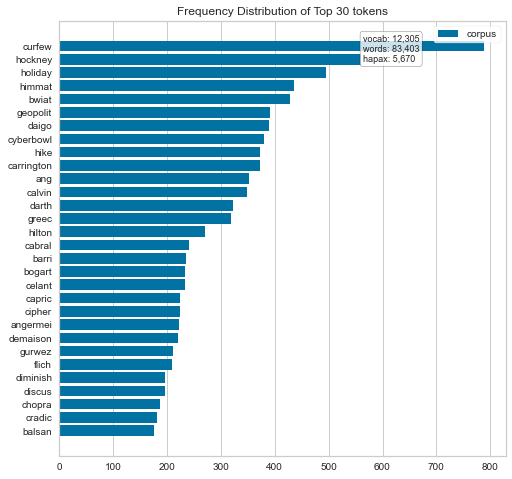

<AxesSubplot:title={'center':'Frequency Distribution of Top 30 tokens'}>

In [135]:
from yellowbrick.text.freqdist import FreqDistVisualizer 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#Countervectorizer with stopwords
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words="english").fit(evaluation_dataset.story)
tfm = vect.transform(evaluation_dataset.story)

# Get all features (tokens)
eval_dataset_features = vect.get_feature_names()

# Use yellowbrick package for visualization of top 30 tokens
fig, ax = plt.subplots(figsize=(8, 8))
visualizer = FreqDistVisualizer(features=main_dataset_features, n=30)
visualizer.fit(tfm)
visualizer.poof()

#### Data Partision

In [136]:
X_eval = evaluation_dataset[['movie_id','story']]
y_eval = evaluation_dataset.DramaGenre

In [148]:
# Apply Term Frequency - Inverse Document Frequency method
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words="english", ngram_range=(1,2),max_features=20000).fit(X_eval.story) 
tfid = vect.transform(X_eval.story)
print("The number of features are: {}".format(len(vect.get_feature_names())))
tfid_eval = pd.DataFrame(tfid.toarray(), columns=vect.get_feature_names())
tfid_eval.head()

The number of features are: 20000


,aaron,abaddon,abaddon hotel,abandon,abandon child,abandon famili,abbey,abbi,abduct,abduct forc,...,zhou,zieg,zimbabw,zimbabw constitut,zingarina,zombi,zombi apocalyps,zombi film,zone,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3 align='left' style="color: Green ;"> Step 7: Use your selected model in Step 5 to predict whether or not movies in evaluation_dataset are Drama movies.</h3>

In [199]:
#Best of all models 
#############################Naive Bayes Predictions#############################################
y_test_hat = best_model_of_all.predict(tfid_eval)

In [201]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_eval,y_test_hat))
print('\n')
print("Classification Report of Multinomial NaiveBayes ")
print("\n")
print(classification_report(y_eval,y_test_hat))

Confusion Matrix
[[1007  872]
 [ 630  793]]


Classification Report of Multinomial NaiveBayes 


              precision    recall  f1-score   support

           0       0.62      0.54      0.57      1879
           1       0.48      0.56      0.51      1423

    accuracy                           0.55      3302
   macro avg       0.55      0.55      0.54      3302
weighted avg       0.56      0.55      0.55      3302



Confusion Matrix - Multinomial NaiveBayes 
[[1007  872]
 [ 630  793]]


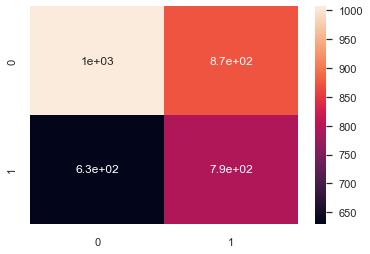

In [202]:
import seaborn as sns; sns.set() 
print("Confusion Matrix - Multinomial NaiveBayes ")
cf_matrix = confusion_matrix(y_eval,y_test_hat)
print(cf_matrix)
cm_df = pd.DataFrame(cf_matrix)
sns.heatmap(cm_df, annot=True)
plt.show()

-

<h3 align='left' style="color: Green ;"> Report the final accuracy, precision, recall and F1 score..</h3>

In [203]:
submission = pd.DataFrame({
    "movieId": X_eval["movie_id"],
    "DramaGenre": y_test_hat
})
submission.to_csv("results.csv", index=False)

In [204]:
print("The Final predictions, whether or not movies in evaluation_dataset are Drama movies are shown below:\n")
submission

The Final predictions, whether or not movies in evaluation_dataset are Drama movies are shown below:



,movieId,DramaGenre
0,56835,1
1,56837,1
2,56846,1
3,56869,0
4,56885,0
...,...,...
3297,196577,0
3298,196587,0
3299,196589,0
3300,196591,1
